# Neural Network
Thông tin thành viên(Họ tên - MSSV):
- Thành viên 1: Võ Trung Tín - 22127417
- Thành viên 2: 

## Kiểm tra môi trường code

In [1]:
import sys
sys.executable

'c:\\Users\\tin75\\anaconda3\\envs\\ml-env\\python.exe'

## Import các thư viện cần thiết

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import psutil
import os

## Đọc và kiểm tra tập dữ liệu import từ thư viện

In [3]:
# Set seed for reproducibility
np.random.seed(42)
random.seed(42)  # tạo ra số giả ngẫu nhiên dựa trên giá trị seed 
(train_X, train_y),(test_X, test_y)=cifar10.load_data() # tải tập dữ liệu lên và lưu vào 4 mảng train_X, train_y và test_X, test_y
print('Số ảnh dùng để train:',len(train_X))
print('Số ảnh dùng để test :',len(test_X))
print('Kích cỡ ảnh train :',train_X.shape)
print('Kích cỡ train_label :',train_y.shape)
print('Kích cỡ ảnh test :',test_X.shape)
print('Kích cỡ test_label :',test_y.shape)

print('Ma trận pixel của một bức tranh:\n', train_X[0])

Số ảnh dùng để train: 50000
Số ảnh dùng để test : 10000
Kích cỡ ảnh train : (50000, 32, 32, 3)
Kích cỡ train_label : (50000, 1)
Kích cỡ ảnh test : (10000, 32, 32, 3)
Kích cỡ test_label : (10000, 1)
Ma trận pixel của một bức tranh:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Nhìn vào các pixel của bức tranh ta thấy đây là một ma trận 3 chiều

## Khám phá dữ liệu huấn luyện

Ta hãy thử xem mặt mũi của vài ảnh trong `train_X` với label trong `train_y`

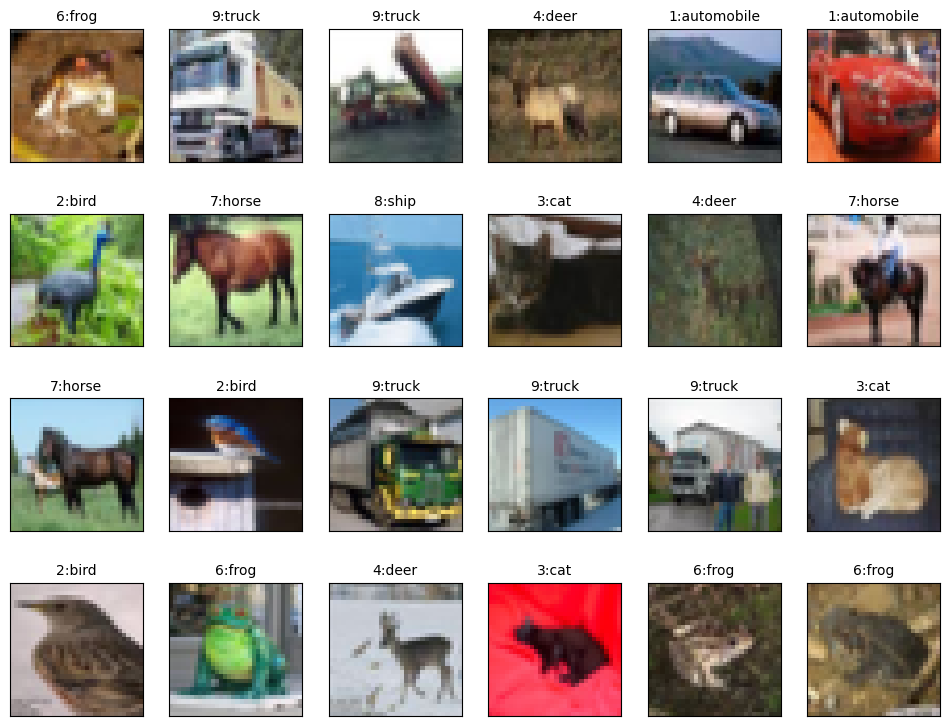

In [4]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
# Tạo một từ điển và gán các giá trị từ 0 đến 9 cho các loại ảnh tương ứng với 10 classes

def showImageandLabel(images, labels,  idx, num=10):
    fig = plt.gcf() # lấy số liệu của 1 hình ảnh và gán cho fig
    
    fig.set_size_inches(12, 14) # kiểm soát kích thước hình ảnh
    
    if num>25: num=25  #Hiển thị lên đến 25
    
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]]# Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); # để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy      
        idx+=1 
    
    plt.show()

showImageandLabel(train_X, train_y, 0, 24) #In 12 ảnh

Tiếp theo, ta hãy xem các giá trị có thể có của `train_y` và số lượng của mỗi giá trị này.

In [5]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 5000
Value: 1, count: 5000
Value: 2, count: 5000
Value: 3, count: 5000
Value: 4, count: 5000
Value: 5, count: 5000
Value: 6, count: 5000
Value: 7, count: 5000
Value: 8, count: 5000
Value: 9, count: 5000


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9 (là 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)). Và số lượng ảnh tương ứng mỗi chữ số bằng nhau.

## Tiền xử lý dữ liệu huấn luyện

(1) Normalize the image data

In [6]:
# Chuẩn hóa pixel từ [0.0 , 255.0] về [0.0, 1.0]
x_train_normalize = train_X.astype('float32') / 255.0  
x_test_normalize = test_X.astype('float32') / 255.0

#Kiểm tra sau khi chuẩn hóa
print(train_X[0][0][0]) # Ban đầu
print(x_train_normalize[0][0][0]) # Đã chuẩn hóa 

[59 62 63]
[0.23137255 0.24313726 0.24705882]


(2) Flatten the image data

In [7]:
# Làm phẳng dữ liệu từ (32, 32, 3) -> (3072,)
x_train = x_train_normalize.reshape(-1, 3072)
x_test = x_test_normalize.reshape(-1, 3072)

# Làm phẳng labels thành vector 1 chiều
y_train_Flatten = train_y.reshape(-1)
y_test_Flatten = test_y.reshape(-1)

#Kiểm tra sau khi làm phẳng dữ liệu
print(x_train[0])    # In toàn bộ vector của hình ảnh đầu tiên
print(y_train_Flatten)       # In toàn bộ labels 

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
[6 9 9 ... 9 1 1]


(3) Apply one-hot encoding to the output labels

In [8]:
# Chuyển labels thành one-hot vector
y_train = np.eye(10)[y_train_Flatten]
y_test = np.eye(10)[y_test_Flatten]

# Kiểm tra sau khi chuyển labels thành one-hot vector
print(y_train.shape)
print(y_train[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Dữ liệu huấn luyện sau khi xử lý lưu trong 4 mảng:
- `x_train`, `x_test`
- `y_train`, `y_test`

## Tìm mô hình Neural Network từ dữ liệu huấn luyện

### **Phân Tích Thiết Kế Mô Hình Training**

---
1. **Layer 1 (Input → Hidden Layer 1):**  
   - **Input Size:** 3072 (ảnh 32×32×3 được làm phẳng).  
   - **Output Size:** 512 (giảm chiều để tập trung vào các đặc trưng quan trọng).  
   - **Activation:** ReLU (giữ tính phi tuyến, giảm vanishing gradient).  
   - **Extra Layers:** 
     - **BatchNorm (512):** Chuẩn hóa đầu ra của lớp, giúp tăng tốc độ hội tụ và ổn định mô hình.  
     - **Dropout (20%):** Ngẫu nhiên bỏ qua 20% neuron để giảm overfitting mà vẫn giữ lại thông tin quan trọng.

2. **Layer 2 (Hidden Layer 1 → Hidden Layer 2):**  
   - **Input Size:** 512.  
   - **Output Size:** 256 (tiếp tục giảm số chiều).  
   - **Activation:** ReLU.  
   - **Extra Layers:** 
     - **BatchNorm (256):** Giúp duy trì ổn định và tránh các giá trị đầu ra quá lớn.  
     - **Dropout (20%):** Giảm overfitting, đặc biệt khi các lớp trước đó có quá nhiều tham số.

3. **Layer 3 (Hidden Layer 2 → Hidden Layer 3):**  
   - **Input Size:** 256.  
   - **Output Size:** 128 (tập trung các đặc trưng sâu hơn).  
   - **Activation:** ReLU.  
   - **Extra Layers:** 
     - **BatchNorm (128):** Cân bằng đầu ra của lớp.  
     - **Dropout (30%):** Tăng khả năng tổng quát hóa bằng cách giảm nguy cơ overfitting tại lớp gần cuối.

4. **Layer 4 (Hidden Layer 3 → Output Layer):**  
   - **Input Size:** 128.  
   - **Output Size:** 10 (ứng với 10 lớp trong CIFAR-10).  
   - **Activation:** Softmax (chuyển đầu ra thành xác suất để phân loại đa lớp).  
   - **Extra Layers:** None, vì đây là lớp đầu ra cuối cùng.

---

#### **Tổng quát**

1. **Số lượng lớp:**  
   - 3 hidden layers là đủ để học các đặc trưng từ tập dữ liệu CIFAR-10.  
   - Việc giảm dần số lượng neuron giúp mô hình tập trung vào các đặc trưng quan trọng hơn khi đi sâu vào mạng.

2. **Kỹ thuật Regularization:**  
   - **Batch Normalization:** Ổn định và tăng tốc độ hội tụ, giúp mô hình hoạt động hiệu quả hơn.  
   - **Dropout:** Giảm nguy cơ overfitting, đặc biệt với dữ liệu có số lượng lớp nhỏ như CIFAR-10.

3. **Kích thước lớp cuối cùng:**  
   - Sử dụng kích thước đầu ra 10 với Softmax đảm bảo mô hình phù hợp cho bài toán phân loại đa lớp.
---

## Model Design and Training with Scikit-learn

## Import các thư viện cần thiết

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Định Nghĩa Hàm Batch Normalization và Dropout thủ công vì MLPClassifier không hỗ trợ trực tiếp các chức năng này:



In [10]:
# Hàm mô phỏng Dropout
def apply_dropout(data, dropout_rate):
    mask = np.random.rand(*data.shape) > dropout_rate  # Tạo mặt nạ dropout
    return data * mask  # Loại bỏ ngẫu nhiên một phần dữ liệu

# Hàm chuẩn hóa BatchNorm
def batch_norm(X, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        return X_norm, scaler  # Trả về giá trị chuẩn hóa và scaler mới
    else:
        X_norm = scaler.transform(X)
        return X_norm  # Trả về giá trị chuẩn hóa


Để sử dụng Scikit-learn's MLPClassifier triển khai một mô hình neural network bao gồm Batch Normalization và Dropout cho từng tầng ẩn. Ta phải tách mô hình thành nhiều tầng và xử lý thủ công các bước Batch Normalization và Dropout giữa các tầng.
Chúng ta sẽ xây dựng từng tầng một, áp dụng Batch Normalization và Dropout sau mỗi tầng.

In [11]:
'''
Adam (Adaptive Moment Estimation) là một thuật toán tối ưu hóa phổ biến, 
kết hợp ưu điểm của Momentum và RMSProp. Nó tự động điều chỉnh tốc độ học (learning rate) 
dựa trên các ước lượng của bậc một (mean) và bậc hai (variance) của gradient.

'''
# Measure Training Time
start_time = time.time()

# Measure CPU Memory Usage for Scikit-learn
process = psutil.Process(os.getpid())
start_memory = process.memory_info().vms  # in bytes

# Layer 1: Input -> Hidden Layer 1
print("Training Layer 1...")
mlp_layer1 = MLPClassifier(
    hidden_layer_sizes=(512,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True  # Đây là mức độ chi tiết khi huấn luyện.    
)
mlp_layer1.fit(x_train, y_train_Flatten)  # Train layer 1


# Apply BatchNorm and Dropout on Layer 1's output
X_train_layer1 = mlp_layer1.predict_proba(x_train)  # Forward pass through layer 1
X_train_layer1, scaler1 = batch_norm(X_train_layer1)  # Batch Normalization
X_train_layer1 = apply_dropout(X_train_layer1, dropout_rate=0.2)  # Dropout

# Layer 2: Hidden Layer 1 -> Hidden Layer 2
print("\nTraining Layer 2...")
mlp_layer2 = MLPClassifier(
    hidden_layer_sizes=(256,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_layer2.fit(X_train_layer1, y_train_Flatten)  # Train layer 2

# Apply BatchNorm and Dropout on Layer 2's output
X_train_layer2 = mlp_layer2.predict_proba(X_train_layer1)  # Forward pass through layer 2
X_train_layer2, scaler2 = batch_norm(X_train_layer2)  # Batch Normalization
X_train_layer2 = apply_dropout(X_train_layer2, dropout_rate=0.2)  # Dropout

# Layer 3: Hidden Layer 2 -> Hidden Layer 3
print("\nTraining Layer 3...")
mlp_layer3 = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_layer3.fit(X_train_layer2, y_train_Flatten)  # Train layer 3

# Apply BatchNorm and Dropout on Layer 3's output
X_train_layer3 = mlp_layer3.predict_proba(X_train_layer2)  # Forward pass through layer 3
X_train_layer3, scaler3 = batch_norm(X_train_layer3)  # Batch Normalization
X_train_layer3 = apply_dropout(X_train_layer3, dropout_rate=0.3)  # Dropout

# Output Layer: Hidden Layer 3 -> Output
print("\nTraining Output Layer...")
mlp_output = MLPClassifier(
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=30,
    random_state=42,
    verbose=True
)
mlp_output.fit(X_train_layer3, y_train_Flatten)  # Train output layer

end_memory = process.memory_info().vms  # in bytes
end_time = time.time()


# In kết quả
ScikitLearn_training_time = end_time - start_time
ScikitLearn_memory_usage = (end_memory - start_memory) / (1024 * 1024)  # MB
print(f"Training Time (Scikit-learn): {ScikitLearn_training_time} seconds")
print(f"Memory Usage (Scikit-learn): {ScikitLearn_memory_usage} MB")


# Dự đoán các lớp
y_pred_layer1 = mlp_layer1.predict(x_train)
y_pred_layer2 = mlp_layer2.predict(X_train_layer1)
y_pred_layer3 = mlp_layer3.predict(X_train_layer2)
y_pred_output = mlp_output.predict(X_train_layer3)

# Tính toán độ chính xác
accuracy_layer1 = accuracy_score(y_train_Flatten, y_pred_layer1)
accuracy_layer2 = accuracy_score(y_train_Flatten, y_pred_layer2)
accuracy_layer3 = accuracy_score(y_train_Flatten, y_pred_layer3)
accuracy_output = accuracy_score(y_train_Flatten, y_pred_output)

# In kết quả độ chính xác
print(f"Accuracy (Layer 1): {accuracy_layer1 * 100:.2f}%")
print(f"Accuracy (Layer 2): {accuracy_layer2 * 100:.2f}%")
print(f"Accuracy (Layer 3): {accuracy_layer3 * 100:.2f}%")
print(f"Accuracy (Output Layer): {accuracy_output * 100:.2f}%")



Training Layer 1...
Iteration 1, loss = 2.03078258
Iteration 2, loss = 1.75305847
Iteration 3, loss = 1.66763276
Iteration 4, loss = 1.62364207
Iteration 5, loss = 1.57910081
Iteration 6, loss = 1.54995497
Iteration 7, loss = 1.52173292
Iteration 8, loss = 1.50307424
Iteration 9, loss = 1.48463120
Iteration 10, loss = 1.45490867
Iteration 11, loss = 1.44034407
Iteration 12, loss = 1.42703018
Iteration 13, loss = 1.42019103
Iteration 14, loss = 1.40456484
Iteration 15, loss = 1.38985772
Iteration 16, loss = 1.37275544
Iteration 17, loss = 1.36265400
Iteration 18, loss = 1.35618916
Iteration 19, loss = 1.34354740
Iteration 20, loss = 1.34243627
Iteration 21, loss = 1.32136214
Iteration 22, loss = 1.31695840
Iteration 23, loss = 1.31525424
Iteration 24, loss = 1.29921564
Iteration 25, loss = 1.29436729
Iteration 26, loss = 1.28432666
Iteration 27, loss = 1.27639404
Iteration 28, loss = 1.27329903
Iteration 29, loss = 1.26623232
Iteration 30, loss = 1.24869618


c:\Users\tin75\anaconda3\envs\ml-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training Layer 2...
Iteration 1, loss = 1.46585816
Iteration 2, loss = 1.36812064
Iteration 3, loss = 1.35043494
Iteration 4, loss = 1.33978935
Iteration 5, loss = 1.33200093
Iteration 6, loss = 1.32715993
Iteration 7, loss = 1.32293229
Iteration 8, loss = 1.32066211
Iteration 9, loss = 1.31770244
Iteration 10, loss = 1.31559397
Iteration 11, loss = 1.31407064
Iteration 12, loss = 1.31179337
Iteration 13, loss = 1.31026208
Iteration 14, loss = 1.30919059
Iteration 15, loss = 1.30767894
Iteration 16, loss = 1.30722150
Iteration 17, loss = 1.30547651
Iteration 18, loss = 1.30448372
Iteration 19, loss = 1.30359549
Iteration 20, loss = 1.30249850
Iteration 21, loss = 1.30162505
Iteration 22, loss = 1.30055766
Iteration 23, loss = 1.29987295
Iteration 24, loss = 1.29907630
Iteration 25, loss = 1.29800596
Iteration 26, loss = 1.29748905
Iteration 27, loss = 1.29758937
Iteration 28, loss = 1.29596682
Iteration 29, loss = 1.29599443
Iteration 30, loss = 1.29495415

Training Layer 3...


c:\Users\tin75\anaconda3\envs\ml-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60223998
Iteration 2, loss = 1.45330974
Iteration 3, loss = 1.43743537
Iteration 4, loss = 1.42626425
Iteration 5, loss = 1.41851240
Iteration 6, loss = 1.41344970
Iteration 7, loss = 1.40954296
Iteration 8, loss = 1.40651757
Iteration 9, loss = 1.40447172
Iteration 10, loss = 1.40212227
Iteration 11, loss = 1.40114613
Iteration 12, loss = 1.39901212
Iteration 13, loss = 1.39816269
Iteration 14, loss = 1.39675054
Iteration 15, loss = 1.39575473
Iteration 16, loss = 1.39465678
Iteration 17, loss = 1.39336621
Iteration 18, loss = 1.39302282
Iteration 19, loss = 1.39198682
Iteration 20, loss = 1.39168261
Iteration 21, loss = 1.39062168
Iteration 22, loss = 1.38981607
Iteration 23, loss = 1.38905778
Iteration 24, loss = 1.38846339
Iteration 25, loss = 1.38810828
Iteration 26, loss = 1.38680075
Iteration 27, loss = 1.38691526
Iteration 28, loss = 1.38557807
Iteration 29, loss = 1.38537548
Iteration 30, loss = 1.38460502


c:\Users\tin75\anaconda3\envs\ml-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Training Output Layer...
Iteration 1, loss = 2.09020198
Iteration 2, loss = 1.74405924
Iteration 3, loss = 1.64472589
Iteration 4, loss = 1.61693934
Iteration 5, loss = 1.60475573
Iteration 6, loss = 1.59727435
Iteration 7, loss = 1.59137644
Iteration 8, loss = 1.58688874
Iteration 9, loss = 1.58299280
Iteration 10, loss = 1.57984163
Iteration 11, loss = 1.57737814
Iteration 12, loss = 1.57512973
Iteration 13, loss = 1.57336686
Iteration 14, loss = 1.57182201
Iteration 15, loss = 1.57044251
Iteration 16, loss = 1.56944172
Iteration 17, loss = 1.56873127
Iteration 18, loss = 1.56771384
Iteration 19, loss = 1.56708866
Iteration 20, loss = 1.56670710
Iteration 21, loss = 1.56604469
Iteration 22, loss = 1.56561943
Iteration 23, loss = 1.56523215
Iteration 24, loss = 1.56493232
Iteration 25, loss = 1.56462232
Iteration 26, loss = 1.56430995
Iteration 27, loss = 1.56396001
Iteration 28, loss = 1.56374043
Iteration 29, loss = 1.56341579
Iteration 30, loss = 1.56313538
Training Time (Scikit-l

c:\Users\tin75\anaconda3\envs\ml-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Layer 1): 56.51%
Accuracy (Layer 2): 53.98%
Accuracy (Layer 3): 50.53%
Accuracy (Output Layer): 43.76%


Chuẩn Bị và Xử Lý Dữ Liệu Kiểm Tra

In [12]:
# Không áp dụng Dropout cho Dữ liệu kiểm tra
# Layer 1 -> Layer 2
X_test_layer1 = mlp_layer1.predict_proba(x_test)  # Forward pass through Layer 1
X_test_layer1 = batch_norm(X_test_layer1, scaler=scaler1)  # Apply BatchNorm

# Layer 2 -> Layer 3
X_test_layer2 = mlp_layer2.predict_proba(X_test_layer1)  # Forward pass through Layer 2
X_test_layer2 = batch_norm(X_test_layer2, scaler=scaler2)  # Apply BatchNorm

# Layer 3 -> Output
X_test_layer3 = mlp_layer3.predict_proba(X_test_layer2)  # Forward pass through Layer 3
X_test_layer3 = batch_norm(X_test_layer3, scaler=scaler3)  # Apply BatchNorm

# Final Output Layer
predictions = mlp_output.predict(X_test_layer3)

Dự Đoán và Đánh Giá Mô Hình

In [13]:
# Predict using Output Layer
pred_probs = mlp_output.predict_proba(X_test_layer3)
pred_labels = np.argmax(pred_probs, axis=1)

# Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test_Flatten, pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_Flatten, pred_labels))



Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1000
           1       0.58      0.65      0.61      1000
           2       0.41      0.34      0.37      1000
           3       0.35      0.37      0.36      1000
           4       0.44      0.42      0.43      1000
           5       0.39      0.39      0.39      1000
           6       0.53      0.60      0.56      1000
           7       0.57      0.57      0.57      1000
           8       0.63      0.60      0.62      1000
           9       0.55      0.51      0.53      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Confusion Matrix:
[[596  48  60  26  25  30  24  34 123  34]
 [ 35 650   8  24   8  22  15  23  53 162]
 [ 88  28 341  83 146 104  97  68  21  24]
 [ 24  16  81 366  51 215 135  49  24  39]
 [ 56  21 149  52 417  56 1

## Model Design and Training with TensorFlow/Keras

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build Keras model
keras_model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# Compile the model
'''
Adam (Adaptive Moment Estimation) là một thuật toán tối ưu hóa phổ biến, 
kết hợp ưu điểm của Momentum và RMSProp. Nó tự động điều chỉnh tốc độ học (learning rate) 
dựa trên các ước lượng của bậc một (mean) và bậc hai (variance) của gradient.
'''
keras_model.compile(optimizer=Adam(),
                    loss='categorical_crossentropy', # Hàm mất mát thường dùng cho các bài toán phân loại đa lớp
                    metrics=['accuracy']) # chỉ số độ chính xác muốn theo dõi trong quá trình huấn luyện


# Measure Training Time
start_time = time.time()

# Measure CPU Memory Usage for Keras
process = psutil.Process(os.getpid())
start_memory = process.memory_info().vms  # in bytes
# Train the model
history = keras_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=200,
    verbose=1 # Đây là mức độ chi tiết khi huấn luyện.     
)
'''
verbose=1 sẽ hiển thị tiến trình huấn luyện với thông tin chi tiết như loss và accuracy sau mỗi epoch
verbose=0: Không hiển thị thông tin.
verbose=2: Hiển thị thông tin chi tiết về mỗi batch.
'''
end_memory = process.memory_info().vms  # in bytes
end_time = time.time()


# In kết quả
keras_training_time = end_time - start_time
keras_memory_usage = (end_memory - start_memory) / (1024 * 1024)  # MB
print(f"Training Time (Keras): {keras_training_time} seconds")
print(f"Memory Usage (Keras): {keras_memory_usage} MB")

# Evaluate the model
test_loss, test_acc = keras_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (Keras): {test_acc}")


Epoch 1/30
250/250 [==============================] - 5s 15ms/step - loss: 1.9799 - accuracy: 0.3227
Epoch 2/30
250/250 [==============================] - 4s 15ms/step - loss: 1.6956 - accuracy: 0.3994
Epoch 3/30
250/250 [==============================] - 4s 15ms/step - loss: 1.6018 - accuracy: 0.4274
Epoch 4/30
250/250 [==============================] - 4s 15ms/step - loss: 1.5455 - accuracy: 0.4471
Epoch 5/30
250/250 [==============================] - 4s 15ms/step - loss: 1.5145 - accuracy: 0.4580
Epoch 6/30
250/250 [==============================] - 4s 15ms/step - loss: 1.4956 - accuracy: 0.4659
Epoch 7/30
250/250 [==============================] - 4s 14ms/step - loss: 1.4730 - accuracy: 0.4740
Epoch 8/30
250/250 [==============================] - 4s 14ms/step - loss: 1.4571 - accuracy: 0.4791
Epoch 9/30
250/250 [==============================] - 4s 14ms/step - loss: 1.4338 - accuracy: 0.4861
Epoch 10/30
250/250 [==============================] - 4s 15ms/step - loss: 1.4246 - accura

313/313 [==============================] - 1s 3ms/step
Classification Report (Keras):
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      1000
           1       0.50      0.76      0.60      1000
           2       0.39      0.41      0.40      1000
           3       0.37      0.42      0.39      1000
           4       0.57      0.24      0.34      1000
           5       0.48      0.40      0.44      1000
           6       0.57      0.57      0.57      1000
           7       0.60      0.56      0.58      1000
           8       0.71      0.53      0.61      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

Confusion Matrix (Keras):
[[635  90  28  23   5  14  21  23  74  87]
 [ 18 759  11  27   2   4  17  12  26 124]
 [146  53 415  98  33  55  94  60  17  29]


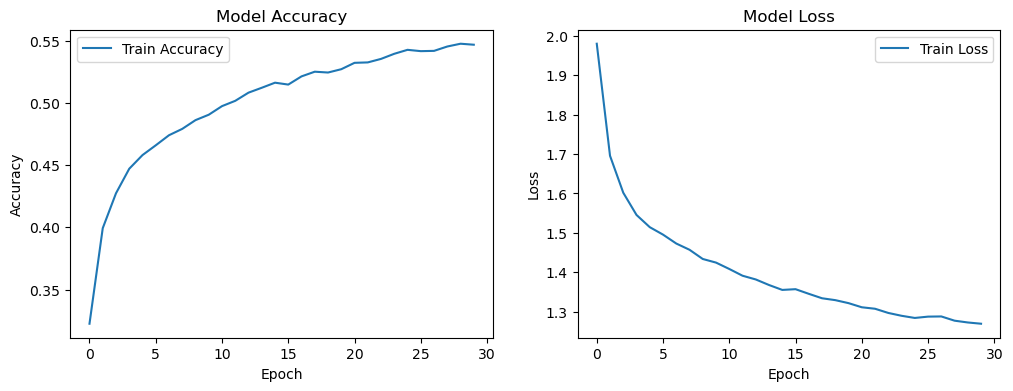

In [15]:
# Predict test set
pred_y_keras = keras_model.predict(x_test)
pred_y_labels = np.argmax(pred_y_keras, axis=1)

# Classification report
print("Classification Report (Keras):")
print(classification_report(y_test_Flatten, pred_y_labels))

# Confusion matrix
print("Confusion Matrix (Keras):")
print(confusion_matrix(y_test_Flatten, pred_y_labels))

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Vẽ Biểu Đồ So Sánh
Sau khi thu thập được Training Time và Memory Usage của các framework, vẽ biểu đồ so sánh.

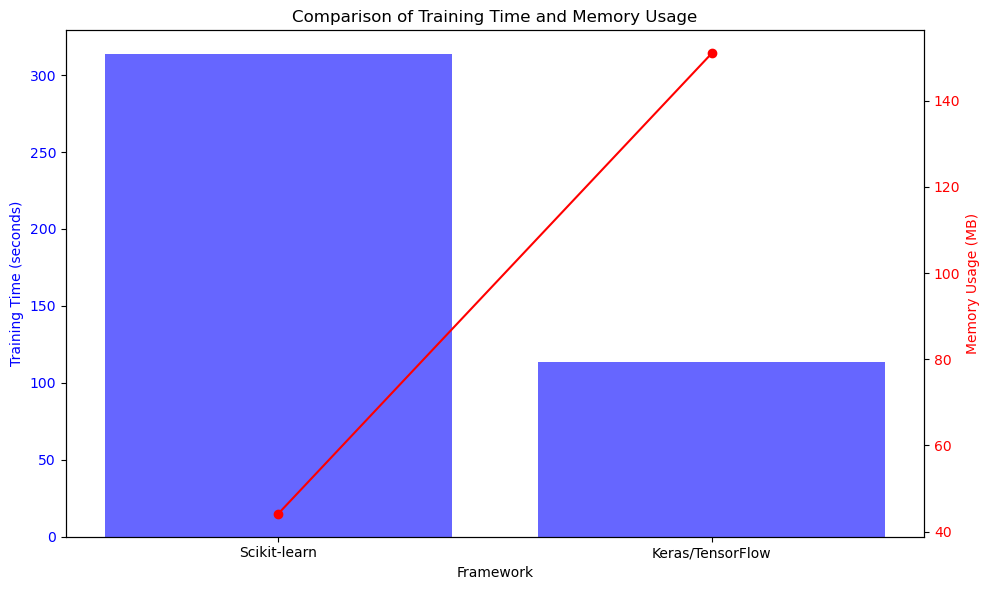

In [17]:
# Các giá trị thu được
frameworks = ['Scikit-learn', 'Keras/TensorFlow']
training_times = [ScikitLearn_training_time, keras_training_time]
memory_usage = [ScikitLearn_memory_usage, keras_memory_usage]  

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cho Training Time
ax1.bar(frameworks, training_times, color='b', alpha=0.6, label="Training Time (seconds)")
ax1.set_xlabel('Framework')
ax1.set_ylabel('Training Time (seconds)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Tạo trục y thứ hai cho Memory Usage
ax2 = ax1.twinx()
ax2.plot(frameworks, memory_usage, color='r', marker='o', label="Memory Usage (MB)")
ax2.set_ylabel('Memory Usage (MB)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Thêm tiêu đề và hiển thị
plt.title('Comparison of Training Time and Memory Usage')
fig.tight_layout()
plt.show()


---
Boundary

- Boundary

Boudary

---